# Project Data_Science 
Handwrriten Arabic Character Recognation Using Deep Learning

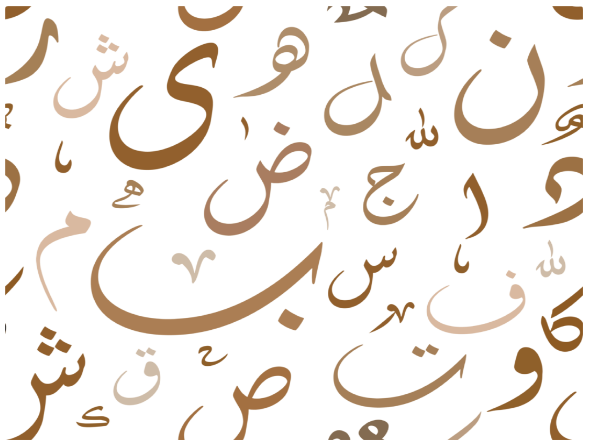

# Importing laibraries 📚

In [27]:
#laibraries for read_data  
import numpy as np
import pandas as pd

# Virsualization for data 
import matplotlib.pyplot as plt

# import Callbacks for EarlySttoping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# important laibary for bulding Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

# Data Augmentation (THis is bonus part)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Read Data From Kaggle 📝

In [28]:
#SPlit our data into 4 parts (x_train,x_test,y_train,y_test)
X_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv').to_numpy()
X_test=pd.read_csv('/kaggle/input/ahcd1/csvTestImages 3360x1024.csv').to_numpy()
y_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv').to_numpy()-1
y_test=pd.read_csv('/kaggle/input/ahcd1/csvTestLabel 3360x1.csv').to_numpy()-1

# Data Exploration 🔎 

In [29]:
# printing the Shape of data to show no rows,columns 
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (13439, 1024)
X_test shape is  (3359, 1024)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


In [30]:
# We Need to do Reshape our Data 
X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

In [31]:
# printing the Shape of data to show no rows,columns after Reshape
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (13439, 32, 32, 1)
X_test shape is  (3359, 32, 32, 1)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


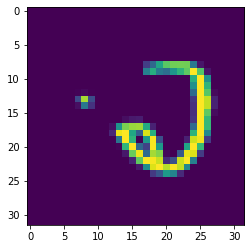

In [32]:
plt.imshow(X_test[150])

In [33]:
#Transform y_train,y_test into Categorical data 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

y_train shape is  (13439, 28)
y_test shape is  (3359, 28)


# Data Augmentation (preprocessing in IMage)

In [35]:
# Data Augmentation
gen=ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.3
)
train_data=gen.flow(
    X_train,
    y_train,
)

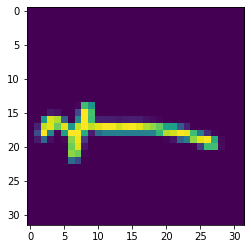

In [36]:
plt.imshow(X_test[0])

# Model :)

In [37]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(28, activation='softmax')
])


# Callbacks

In [38]:
reduce=ReduceLROnPlateau(
    factor=0.03,
    min_lr=0.000001
)

In [39]:
callbacks=[reduce]

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)         

# Fiting

In [42]:
model.fit(train_data,epochs=30,validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/30
420/420 [==============================] - 17s 40ms/step - loss: 1.5780 - accuracy: 0.4848 - val_loss: 97.7530 - val_accuracy: 0.7199
Epoch 2/30
420/420 [==============================] - 17s 41ms/step - loss: 0.6816 - accuracy: 0.7602 - val_loss: 71.9260 - val_accuracy: 0.8101
Epoch 3/30
420/420 [==============================] - 17s 40ms/step - loss: 0.4782 - accuracy: 0.8370 - val_loss: 59.1302 - val_accuracy: 0.8753
Epoch 4/30
420/420 [==============================] - 16s 38ms/step - loss: 0.3763 - accuracy: 0.8748 - val_loss: 47.0650 - val_accuracy: 0.9050
Epoch 5/30
420/420 [==============================] - 16s 39ms/step - loss: 0.3121 - accuracy: 0.8954 - val_loss: 50.0587 - val_accuracy: 0.9050
Epoch 6/30
420/420 [==============================] - 16s 38ms/step - loss: 0.2658 - accuracy: 0.9115 - val_loss: 40.3802 - val_accuracy: 0.9268
Epoch 7/30
420/420 [==============================] - 17s 40ms/step - loss: 0.2340 - accuracy: 0.9244 - val_loss: 46.4814 - val_ac

# Accuracy

In [43]:
losses=pd.DataFrame(model.history.history)

In [44]:
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,1.577960,0.484783,97.752960,0.719857,0.00100
1,0.681617,0.760176,71.925964,0.810063,0.00100
2,0.478166,0.836967,59.130215,0.875260,0.00100
3,0.376303,0.874767,47.065029,0.905031,0.00100
4,0.312064,0.895379,50.058697,0.905031,0.00100
5,0.265833,0.911452,40.380211,0.926764,0.00100
6,0.234023,0.924399,46.481441,0.916344,0.00100
7,0.209628,0.930203,39.471535,0.938970,0.00100
8,0.182665,0.939876,45.105446,0.936588,0.00100
9,0.174256,0.942034,45.329357,0.934802,0.00100


<AxesSubplot:>

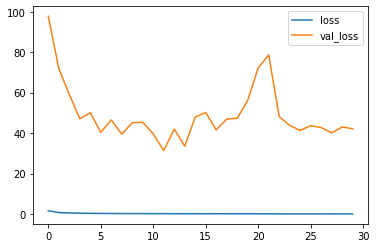

In [45]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

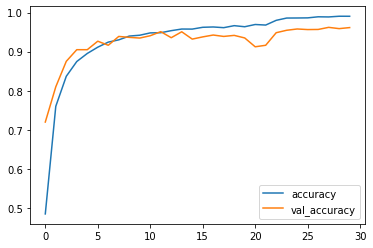

In [46]:
losses[['accuracy','val_accuracy']].plot()

In [47]:
model.evaluate(X_test,y_test)

105/105 [==============================] - 1s 12ms/step - loss: 42.1356 - accuracy: 0.9616


[42.13557052612305, 0.9615957140922546]

In [48]:
predict=model.predict(X_test)

# **Predicting**

In [79]:
# 550 Means the picture number in test_data
x=np.argmax(predict[550])  
if(x==23):
    print("لام")
else:
    print(":) للاسف مش لام ")    
#and the output Means this is the label of this charater(الف,باء,تاء.......)

لام


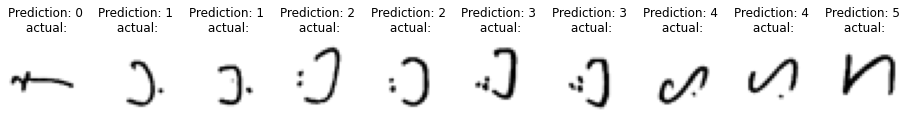

In [80]:
pred=model.predict(X_test)
pred = [np.argmax(i) for i in pred]
_,axes = plt.subplots(nrows=1,ncols=10 , figsize=(16,4))
for ax,image, actual, prediction in zip(axes,X_test,y_test,pred):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title(f'Prediction: {prediction}\n actual:')

In [89]:
np.argmax(y_test[1])

1

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test[1],predict[1])

array([[27,  0],
       [ 0,  1]])